In [41]:
import pandas as pd
import numpy as np
import matplotlib
import os
from matplotlib import pyplot as plt
matplotlib.rc('text', usetex = True)
params = {'backend': 'ps',
#           'text.latex.preamble': [r'\usepackage{gensymb}'],
          'axes.labelsize': 14, # fontsize for x and y labels (was 10)
          'axes.titlesize': 14,
          'font.size': 10, # was 10
          'legend.fontsize': 10, # was 10
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          'font.family': 'serif',
          'image.cmap':'viridis'
}
matplotlib.rcParams.update(params)

In [42]:
df_path = r".\tex_logs\VGG16\Cifar10\VGG16_bs128_e50_t10000_idOverfit.csv"
df = pd.read_csv(df_path, sep=';', index_col=0)

eval-saturation_classifier-2
eval-saturation_features-0
eval-saturation_features-13
eval-saturation_features-18
eval-saturation_features-22
eval-saturation_features-26
eval-saturation_features-31
eval-saturation_features-35
eval-saturation_features-39
eval-saturation_features-4
eval-saturation_features-44
eval-saturation_features-48
eval-saturation_features-52
eval-saturation_features-9


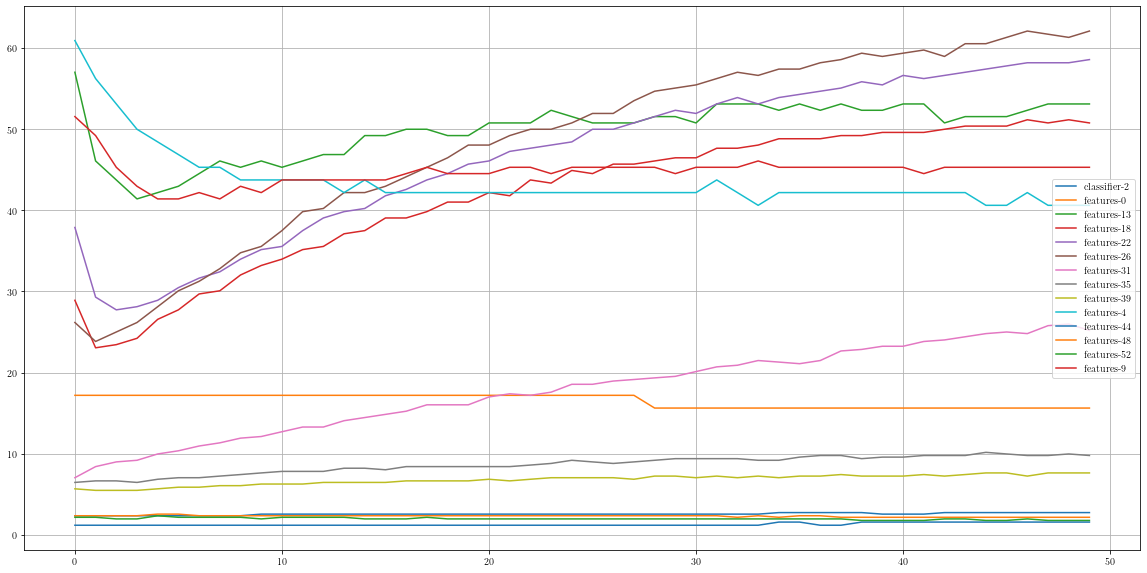

In [43]:
eval_cols = [col for col in  list(df.columns) if 'eval-' in col]
plt.figure(figsize=(20,10))
for col in eval_cols:
    if 'convolution' in col or 'classifier-7' in col:
        continue
    print(col)
    col_name = col.split('_')[-1]
    plt.plot(df[col], label=col_name)
plt.legend()
plt.grid()
plt.show()

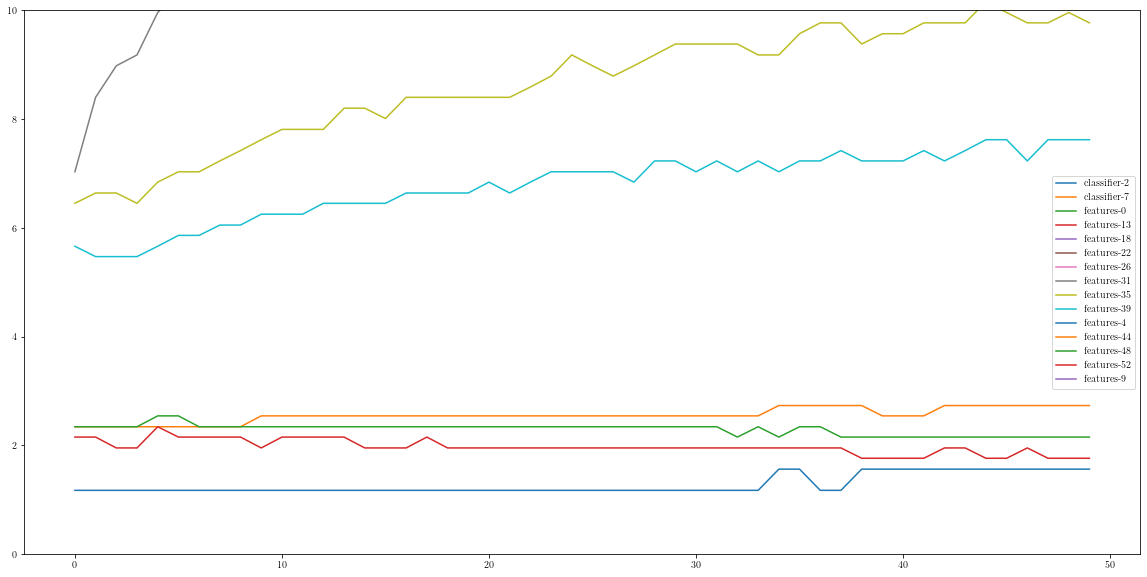

In [44]:
eval_cols = [col for col in  list(df.columns) if 'eval-' in col]
plt.figure(figsize=(20,10))
for col in eval_cols:
    #print(col)
    if 'convolution' in col:
        continue
    col_name = col.split('_')[-1]
    plt.plot(df[col], label=col_name)
plt.ylim(0,10)
plt.legend()
plt.show()

In [45]:
working_df = df[eval_cols]
mapper = {
    eval_col : f'Conv-{eval_col.split("-")[-1]}' if 'features-' in eval_col else f'Lin-{eval_col.split("-")[-1]}' 
    for eval_col in eval_cols
}
working_df.rename(columns=mapper, inplace=True)
working_df.head()

,Lin-2,Lin-7,Conv-0,Conv-convolution,Conv-mean_subtracting_convolution,Conv-convolution,Conv-mean_subtracting_convolution,Conv-13,Conv-convolution,Conv-mean_subtracting_convolution,...,Conv-mean_subtracting_convolution,Conv-48,Conv-convolution,Conv-mean_subtracting_convolution,Conv-convolution,Conv-mean_subtracting_convolution,Conv-52,Conv-convolution,Conv-mean_subtracting_convolution,Conv-9
0,1.17,50.0,17.19,17.19,0.0,51.56,0.0,57.03,57.03,0.0,...,0.0,2.34,2.34,0.0,60.94,0.0,2.15,2.15,0.0,51.56
1,1.17,50.0,17.19,17.19,0.0,49.22,0.0,46.09,46.09,0.0,...,0.0,2.34,2.34,0.0,56.25,0.0,2.15,2.15,0.0,49.22
2,1.17,60.0,17.19,17.19,0.0,45.31,0.0,43.75,43.75,0.0,...,0.0,2.34,2.34,0.0,53.12,0.0,1.95,1.95,0.0,45.31
3,1.17,60.0,17.19,17.19,0.0,42.97,0.0,41.41,41.41,0.0,...,0.0,2.34,2.34,0.0,50.00,0.0,1.95,1.95,0.0,42.97
4,1.17,60.0,17.19,17.19,0.0,41.41,0.0,42.19,42.19,0.0,...,0.0,2.54,2.54,0.0,48.44,0.0,2.34,2.34,0.0,41.41


In [46]:
cols = list(working_df.columns)
print(cols)
new_cols = [col for col in cols if not 'convolution' in col]
lin = 0
conv = 0
conv_layers = sorted([cl for cl in new_cols if 'Conv-' in cl])
conv_layers.sort(key=lambda x: (float(x.split('-')[-1]), len(x)))
lin_layers = sorted([cl for cl in new_cols if 'Lin-' in cl])
lin_layers.sort(key=lambda x: (float(x.split('-')[-1]), len(x)))
layers = conv_layers+lin_layers[:-1]
working_df = working_df[layers]
mapper = {}
conv = 0
lin = 0
for layer in layers:
    if 'Conv' in layer:
        mapper[layer] = layer.split('-')[0]+'-'+str(conv)
        conv += 1
    else:
        mapper[layer] = layer.split('-')[0]+'-'+str(lin)
        lin += 1
new_working_df = working_df.rename(columns=mapper, inplace=True)
working_df.head(10)

['Lin-2', 'Lin-7', 'Conv-0', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-13', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-18', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-22', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-26', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-31', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-35', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-39', 'Conv-4', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-44', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-48', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-52', 'Conv-convolution', 'Conv-mean_subtracting_convolution', 'Conv-9']


,Conv-0,Conv-1,Conv-2,Conv-3,Conv-4,Conv-5,Conv-6,Conv-7,Conv-8,Conv-9,Conv-10,Conv-11,Conv-12,Lin-0
0,17.19,60.94,51.56,57.03,28.91,37.89,26.17,7.03,6.45,5.66,2.34,2.34,2.15,1.17
1,17.19,56.25,49.22,46.09,23.05,29.30,23.83,8.40,6.64,5.47,2.34,2.34,2.15,1.17
2,17.19,53.12,45.31,43.75,23.44,27.73,25.00,8.98,6.64,5.47,2.34,2.34,1.95,1.17
3,17.19,50.00,42.97,41.41,24.22,28.12,26.17,9.18,6.45,5.47,2.34,2.34,1.95,1.17
4,17.19,48.44,41.41,42.19,26.56,28.91,28.12,9.96,6.84,5.66,2.34,2.54,2.34,1.17
5,17.19,46.88,41.41,42.97,27.73,30.47,30.08,10.35,7.03,5.86,2.34,2.54,2.15,1.17
6,17.19,45.31,42.19,44.53,29.69,31.64,31.25,10.94,7.03,5.86,2.34,2.34,2.15,1.17
7,17.19,45.31,41.41,46.09,30.08,32.42,32.81,11.33,7.23,6.05,2.34,2.34,2.15,1.17
8,17.19,43.75,42.97,45.31,32.03,33.98,34.77,11.91,7.42,6.05,2.34,2.34,2.15,1.17
9,17.19,43.75,42.19,46.09,33.20,35.16,35.55,12.11,7.62,6.25,2.54,2.34,1.95,1.17


In [47]:
working_df.head()
accuracies = df['test_accuracy'].values
working_df.head(50)

,Conv-0,Conv-1,Conv-2,Conv-3,Conv-4,Conv-5,Conv-6,Conv-7,Conv-8,Conv-9,Conv-10,Conv-11,Conv-12,Lin-0
0,17.19,60.94,51.56,57.03,28.91,37.89,26.17,7.03,6.45,5.66,2.34,2.34,2.15,1.17
1,17.19,56.25,49.22,46.09,23.05,29.30,23.83,8.40,6.64,5.47,2.34,2.34,2.15,1.17
2,17.19,53.12,45.31,43.75,23.44,27.73,25.00,8.98,6.64,5.47,2.34,2.34,1.95,1.17
3,17.19,50.00,42.97,41.41,24.22,28.12,26.17,9.18,6.45,5.47,2.34,2.34,1.95,1.17
4,17.19,48.44,41.41,42.19,26.56,28.91,28.12,9.96,6.84,5.66,2.34,2.54,2.34,1.17
5,17.19,46.88,41.41,42.97,27.73,30.47,30.08,10.35,7.03,5.86,2.34,2.54,2.15,1.17
6,17.19,45.31,42.19,44.53,29.69,31.64,31.25,10.94,7.03,5.86,2.34,2.34,2.15,1.17
7,17.19,45.31,41.41,46.09,30.08,32.42,32.81,11.33,7.23,6.05,2.34,2.34,2.15,1.17
8,17.19,43.75,42.97,45.31,32.03,33.98,34.77,11.91,7.42,6.05,2.34,2.34,2.15,1.17
9,17.19,43.75,42.19,46.09,33.20,35.16,35.55,12.11,7.62,6.25,2.54,2.34,1.95,1.17


In [58]:
from os.path import join

def plot_conv(df: pd.DataFrame, title='', acc=1.0, color=None):
    fig, ax = plt.subplots()
    col = list(df.columns)
    conv_layers = sorted([cl for cl in col if 'Conv-' in cl])
    conv_layers.sort(key=lambda x: (float(x.split('-')[-1]), len(x)))
    lin_layers = sorted([cl for cl in col if 'Lin-' in cl])
    lin_layers.sort(key=lambda x: (float(x.split('-')[-1]), len(x)))
    print(col)
    layer_cols = df[conv_layers+lin_layers].values[0]
    #print(color)
    plt.plot(np.arange(0, len(layer_cols), 1), np.squeeze(layer_cols/100))
    plt.scatter(np.arange(0, len(layer_cols), 1), np.squeeze(layer_cols/100), color=color)
    plt.xticks(np.arange(0, len(layer_cols), 1), conv_layers+lin_layers, rotation='vertical')
    plt.ylim(0,1)
    #plt.title(title)
    plt.grid(axis='y')
    plt.ylabel('Saturation')
    plt.xlabel('Layers')
    plt.text(0.92, 0.85,f'test acc.:\t{round(acc, 3)}\n$s_\mu$:  {round(np.mean(layer_cols/100),3)}',
     horizontalalignment='right',
     verticalalignment='center',
     transform = ax.transAxes,
            fontsize=16)
    #print(layer_cols, lin_layers)
    
def plot_saturation_level_ax(cols, acc, ax):
    ax.grid()
    ax.bar(list(range(len(cols))), cols)
    ax.set_xticks([])
    ax.set_ylim((0,100))
    ax.text(3, 90, 'Accuray: {}'.format(acc))

def _extract_final_epoch_accuracy(run_csv_path) -> float:
    accs = []
    for t in [10000, 20000, 30000]:
        x = pd.read_csv(run_csv_path.replace('t10000', f't{t}'), sep=';')
        x = x['test_accuracy'].values[-1]
     #   print(x)
        if not np.isnan(x):
            accs.append(x)
    #print()
    return round(np.mean(accs), 3)

def _get_saturation_result_path(raw_path, sat_thresh) -> str:
    return raw_path.replace('.csv', f'_if{sat_thresh}.csv')

def _extract_data_from_saturation_pathfile(path):
    df = pd.read_csv(path, sep=';')
    col = list(df.columns)
    #print(col)
    conv_layers = sorted([cl for cl in col if 'Conv-' in cl])
    conv_layers.sort(key=lambda x: (float(x.split('-')[-1]), len(x)))
    lin_layers = sorted([cl for cl in col if 'Lin-' in cl])
    lin_layers.sort(key=lambda x: (float(x.split('-')[-1]), len(x)))
    layer_cols = df[conv_layers+lin_layers].values[0]
    names = conv_layers+lin_layers
    return names, layer_cols, np.mean(layer_cols)


def _extract_data_from_multiple_pathfiles(path):
    cols = []
    for t in [10000, 20000, 30000]:
        names, layer_cols, mean_cols = _extract_data_from_saturation_pathfile(path.replace('t10000', f't{t}'))
        cols.append(layer_cols)
    layer_cols = np.mean(cols, axis=0)
    return names, layer_cols, np.mean(layer_cols)
    
        
def extract_layer_saturation(run_csv_path):
    #print('Extracting', run_csv_path)
    acc = _extract_final_epoch_accuracy(run_csv_path)
    #print('Acc:', acc)
    filename = _get_saturation_result_path(run_csv_path, 0.99)
    #print('filename:', filename)
    names, layer_cols, avg_sat = _extract_data_from_multiple_pathfiles(filename)
    return names, layer_cols, acc, avg_sat

def plot_for_model(model, dataset, identifier, trial, filterstack, batch_size):
    filepath = join('.', 
                    'logs', 
                    'VGG{}{}'.format(model, filterstack), 
                    dataset, 
                    'VGG{}{}_bs{}_e30_t{}_id{}.csv'.format(model, filterstack, batch_size, trial, identifier))
    acc = _extract_final_epoch_accuracy(filepath)
    sat_file = _get_saturation_result_path(filepath, 0.99)
    df = pd.read_csv(sat_file, sep=';')
    mapper = {
        '' : 'full',
        '_S': 'halfed',
        '_XS': 'quartered',
        '_XXS': 'eigths',
        '_XXXS': 'sixteenth'
    }
    title = f'VGG{model} with {mapper[filterstack]} filter sizes'
    plot_conv(title=title, df=df, acc=acc)

['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


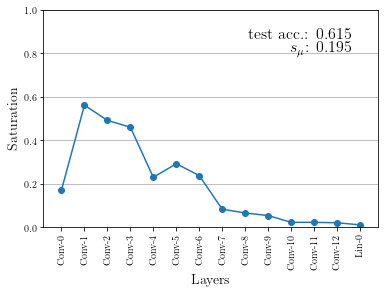

In [59]:
epoch = 1
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch}', accuracies[epoch])
plt.savefig(
    f"c10_vgg16_epoch1.eps",
    format="eps",
    dpi=1000,
    bbox_inches="tight",
)

['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


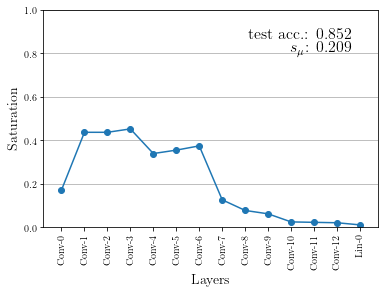

In [60]:
epoch = 10
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch}', accuracies[epoch])

['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


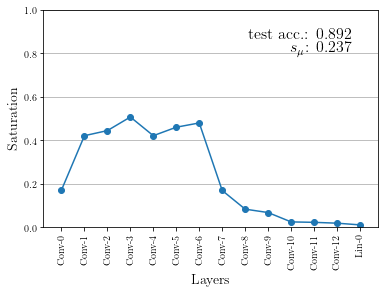

In [61]:
epoch = 20
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch}', accuracies[epoch])
plt.savefig(
    f"c20_vgg16_epoch1.eps",
    format="eps",
    dpi=1000,
    bbox_inches="tight",
)

['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


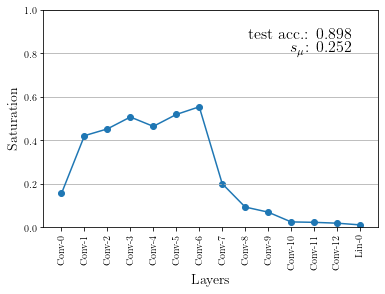

In [52]:
epoch = 30
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch}', accuracies[epoch])

['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


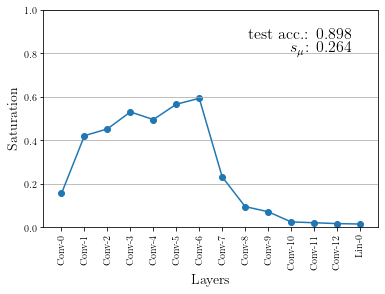

In [53]:
epoch = 40
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch}', accuracies[epoch])

['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


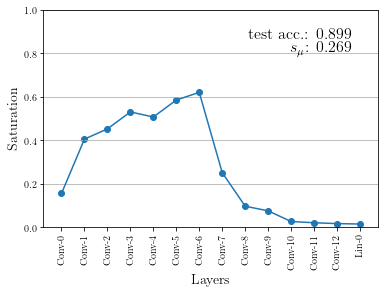

In [54]:
epoch = 49
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch}', accuracies[epoch])

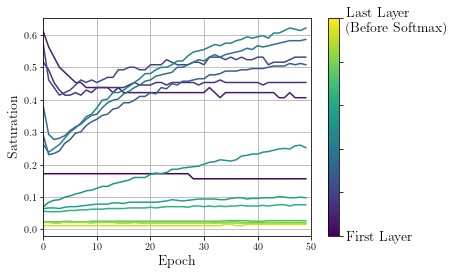

In [55]:
eval_cols = list(working_df.columns) 
#fig, ax = plt.subplots(figsize=(5, 4))
cmap = plt.get_cmap('viridis')
c_s = []
for i, col in enumerate(eval_cols):
    #if i == 0:
    #    continue
    c = i/len(eval_cols)
    c_s.append(c)
    col_name = col.split('_')[-1]
    plt.plot(working_df[col]/100, label=col_name, color=cmap(c))
cbar = plt.colorbar(plt.cm.ScalarMappable(cmap=cmap))
cbar.ax.set_yticklabels(['First Layer','' ,'', '' ,'', 'Last Layer\n (Before Softmax)'])
cbar.ax.tick_params(labelsize=14)
#plt.legend()
plt.xlim((0, 50))
plt.xlabel('Epoch')
plt.ylabel('Saturation')
#plt.title('VGG16 layer saturations during training')
plt.grid()
plt.savefig(
    f"c10_vgg16_historic.eps",
    format="eps",
    dpi=1000,
    bbox_inches="tight",
)

14
(1, 14)
['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


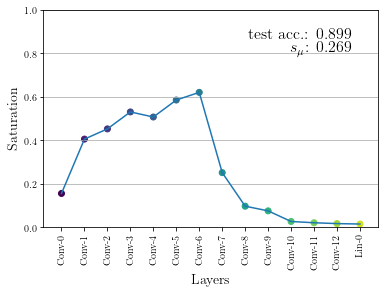

In [56]:
print(len(c_s))
print(working_df[working_df.index == epoch].shape)
epoch = 49
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch+1}', accuracies[epoch], color=[cmap(c) for c in c_s])
plt.savefig(
    f"c10_vgg16_epoch50.eps",
    format="eps",
    dpi=1000,
    bbox_inches="tight",
)

14
(1, 14)
['Conv-0', 'Conv-1', 'Conv-2', 'Conv-3', 'Conv-4', 'Conv-5', 'Conv-6', 'Conv-7', 'Conv-8', 'Conv-9', 'Conv-10', 'Conv-11', 'Conv-12', 'Lin-0']


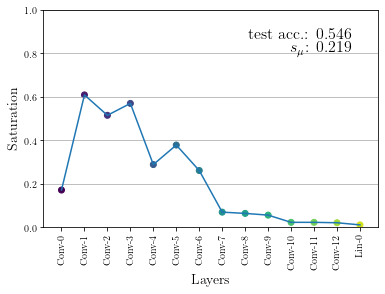

In [57]:
print(len(c_s))
print(working_df[working_df.index == epoch].shape)
epoch = 0
plot_conv(working_df[working_df.index == epoch], f'VGG16 at the end of epoch {epoch+1}', accuracies[epoch], color=[cmap(c) for c in c_s])
plt.savefig(
    f"c10_vgg16_epoch1.eps",
    format="eps",
    dpi=1000,
    bbox_inches="tight",
)